In [1]:
import numpy as np
from matplotlib import pyplot as plt
from data import data_utils 
import math

In [2]:
def gaussian_rbf(x, z, theta):
    return np.exp(-np.sum(np.square(x-np.transpose(z)))/theta)

In [3]:
# x = x_train[1]
# print(x)
# y = x_train[2]
# print(y)
# gaussian_rbf(x,y,1)

In [5]:
def RMSE(yReal, yPredicted):
    return (yPredicted == yReal).sum() / len(yReal)

In [6]:
x_train, x_valid, x_test, y_train, y_valid, y_test = data_utils.load_dataset('iris')

In [18]:
n = len(x_train)
pheta = [0.05, 0.1, 0.5, 1, 2]
kvalues = [0.001, 0.01, 0.1, 1]
val_error = []
temp_error = []

for p in pheta:

    Gram = np.zeros([n,n])
    
    #I want to vectorize
    for i in range(n):
        for j in range(n):
            Gram[i][j] = gaussian_rbf(x_train[i],x_train[j],p)
            
#     print(Gram)
    
    #I want to vectorize
    kx = np.zeros([len(x_valid),n])
    for i in range(len(x_valid)):
        x = x_valid[i]
        for j in range(n):
            kx[i][j] = gaussian_rbf(x,x_train[j],p)

    temp_error = []
    for k in kvalues:

        R = np.linalg.cholesky((Gram + k*np.identity(n)))

        # want the inverse of (R R.T)^-1

        Rinv = np.linalg.inv(R)

        alpha = np.dot(Rinv.T, Rinv)
        alpha = np.dot(alpha,y_train)

#         print('alpha shape', alpha.shape)
#         print('kx shape', kx.shape)


        y_val_predicted =  np.dot(kx, alpha)
#         print('y_val_predicted',y_val_predicted.shape)

        y_val_predicted = np.argmax(y_val_predicted, axis=1)
        y_answ_valid = np.argmax(1 * y_valid, axis=1)
#         print(y_answ_valid)
#         print(y_val_predicted)

        error = RMSE(y_answ_valid,y_val_predicted)

        temp_error.append(error) 
        
    val_error.append(temp_error)


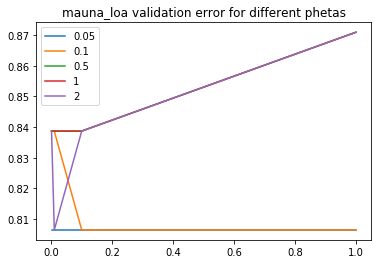

[0.8387096774193549,
 0.8387096774193549,
 0.8387096774193549,
 0.8709677419354839]

In [22]:
plt.plot(kvalues,val_error[0],kvalues,val_error[1],kvalues,val_error[2],kvalues,val_error[3],kvalues,val_error[4])
plt.legend(['0.05', '0.1', '0.5', '1', '2'])
plt.title('mauna_loa validation error for different phetas')
plt.show()
#best accuracy at k 1, pheta = 2 @ 87.096 %


In [20]:
x_all = np.vstack([x_train, x_valid])
y_all = np.vstack([y_train, y_valid])

n = len(x_all)
pheta = [0.05, 0.1, 0.5, 1, 2]
kvalues = [0.001, 0.01, 0.1, 1]
test_error = []
temp_error = []

for p in pheta:

    Gram = np.zeros([n,n])
    
    #I want to vectorize
    for i in range(n):
        for j in range(n):
            Gram[i][j] = gaussian_rbf(x_all[i],x_all[j],p)
            
#     print(Gram)
    
    #I want to vectorize
    kx = np.zeros([len(x_test),n])
    for i in range(len(x_test)):
        x = x_test[i]
        for j in range(n):
            kx[i][j] = gaussian_rbf(x,x_all[j],p)

    temp_error = []
    for k in kvalues:

        R = np.linalg.cholesky((Gram + k*np.identity(n)))

        # want the inverse of (R R.T)^-1

        Rinv = np.linalg.inv(R)

        alpha = np.dot(Rinv.T, Rinv)
        alpha = np.dot(alpha,y_all)



        y_test_predicted = np.argmax(np.dot(kx, alpha), axis=1)
        y_answ_test = np.argmax(1 * y_test, axis=1)

        error = RMSE(y_answ_test,y_test_predicted)

        temp_error.append(error) 
        
    test_error.append(temp_error)



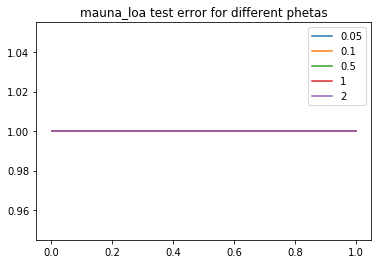

In [21]:
plt.plot(kvalues,test_error[0],kvalues,test_error[1],kvalues,test_error[2],kvalues,test_error[3],kvalues,test_error[4])
plt.legend(['0.05', '0.1', '0.5', '1', '2'])
plt.title('mauna_loa test error for different phetas')
plt.show()
